# Review Analysis
### Analisis de todas las reviews de empresas que:

1) Tienen una eperiencias

2) Esta experiencia cruza con una empresa normalizada (>70%)

3) Esta experiencia normalizada tiene una review hecha por el candidato


<img src="imagen_uno.png" width="400">

In [1]:
import psycopg2
import numpy as np
import pandas as pd
import datetime as dt
import cx_Oracle
import csv
from matplotlib import pyplot as plt 
import seaborn as sns                
from time import strptime            
%matplotlib inline                   

Analisis de reviews para empresas con experiencias normalizadas

    Total de experiencias >> Normalizacion de empresas >> Reviews

### Cargar y agregar nuevas columnas para analisis

In [15]:
#Load the data 
df_csv = pd.read_csv('reviews_merge_all.csv')#, encoding='latin-1', sep='|', header=None)

In [16]:
reviews_retail = df_csv

In [17]:
reviews_retail.head()

,EXPERIENCE_ID,ID_EXPERIENCIA_NORM,EMPRESA,DATE_REVIEW,SCORE,TITLE,DESCRIPTION,MONTH_ID
0,1250997994,4622,Bull Espa?a,2019-01-27 00:00:00,3,Empresa con poca fiabilidad laboral,Siempre sembrando rumores de despidos masivos....,2019-01
1,1311597744,620,"Toys ""R"" Us",2019-02-05 00:00:00,0,Responsable y comprometida,Toysrus es una buena empresa para trabajar. He...,2019-02
2,1371683156,747,Unicaja Banco,2019-10-16 00:00:00,5,Entidad financiera con gran trayectoria,La entidad dispone de una gran cartera de clie...,2019-10
3,1372350064,627,Jazztel,2019-10-24 00:00:00,4,bien,bien.,2019-10
4,814034074,-1,autonomo,2019-11-20 00:00:00,3,bueno,bueno,2019-11


In [18]:
reviews_retail['MONTH_DATE'] = reviews_retail['MONTH_ID']+'-01'

In [19]:
reviews_retail['MONTH_DATE'] = pd.to_datetime(reviews_retail['MONTH_DATE'])
reviews_retail['DATE_REVIEW'] = pd.to_datetime(reviews_retail['DATE_REVIEW'])

In [20]:
# add month and year
reviews_retail['MONTH'] = reviews_retail['MONTH_ID'].str[5:]
reviews_retail['YEAR'] = reviews_retail['MONTH_ID'].str[:4]

In [21]:
reviews_retail=reviews_retail[reviews_retail['YEAR']=='2019']

In [22]:
reviews_retail.shape

(371729, 11)

### Cantidad de Reviews por Empresa

In [23]:
grouped = reviews_retail.groupby(['EMPRESA', 'SCORE'])

metrics = grouped.agg({'EXPERIENCE_ID': pd.Series.nunique
                      })

metrics.head()

EXPERIENCE_ID
EMPRESA                               SCORE               
 Campamentos y Actividades Educativas 3                  5
                                      4                  8
                                      5                 33
 Universitat de Lleida                1                  2
                                      3                  3

In [24]:
metrics['EXPERIENCE_ID'].unstack(0)

EMPRESA,Campamentos y Actividades Educativas,Universitat de Lleida,100 Montaditos,13 TV,20 Minutos,360 Talent,3ASIDE Consultors,40 Grados a la Sombra,40Grados,4set TALENT & TECHNOLOGY,...,universidad,utopia.AI,vLex,varias,varias empresas,varios,vivienda2,voluntariado,voluntariado de accion social,zapateria
SCORE,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN
1,NaN,2.0,54.0,NaN,3.0,1.0,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,29.0,5.0,6.0,1.0,1.0,NaN,1.0
2,NaN,NaN,59.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,37.0,16.0,3.0,NaN,NaN,NaN,2.0
3,5.0,3.0,96.0,NaN,NaN,1.0,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,165.0,55.0,35.0,2.0,3.0,1.0,8.0
4,8.0,5.0,123.0,3.0,3.0,1.0,NaN,1.0,2.0,NaN,...,5.0,NaN,1.0,211.0,66.0,45.0,8.0,7.0,2.0,9.0
5,33.0,14.0,221.0,NaN,14.0,3.0,1.0,1.0,6.0,4.0,...,24.0,2.0,NaN,447.0,120.0,86.0,5.0,29.0,10.0,31.0


### Cantidad de reviews por mes

In [25]:
# Create dataframe with review counts by month 
countbymonth = reviews_retail.MONTH.value_counts()
month = countbymonth.index
mcount = countbymonth.values
mcount = list(mcount)
month = list(month)
countbymonth_df = pd.DataFrame( {'Month': month, 'Count': mcount})

In [26]:
countbymonth_df = countbymonth_df.sort_values(by ='Month').reset_index(drop=True)

In [27]:
countbymonth_df

,Month,Count
0,01,19458
1,02,22159
2,03,29089
3,04,32315
4,05,41841
5,06,31372
6,07,37389
7,08,39068
8,09,56926
9,10,52811


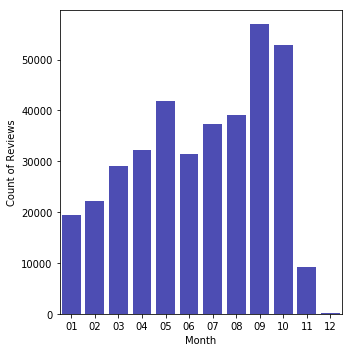

In [28]:
# Plot bar graph of review counts by month
plt.figure(figsize=(5,5))
reviewcounts_mth = sns.barplot(countbymonth_df.Month, countbymonth_df.Count, color="blue", saturation=0.4)
reviewcounts_mth.set(xlabel='Month', ylabel='Count of Reviews')
plt.tight_layout()

A partir del mes de mayo se cambia el proceso para tomar un mayor % de reviews que antes no se estaban gaurdando en BBDD. 

Queda pendiente ver la posibilidad de re-procesar la data para meses anteriores

### Cantidad de reviews por empresa

In [29]:
# Create dataframe with review counts by retail company
countbyfirm = reviews_retail.EMPRESA.value_counts()
company = countbyfirm.index
count = countbyfirm.values
company = list(company)
count = list(count)
countbyfirm_df = pd.DataFrame( {'Company': company, 'Count': count})

In [30]:
countbyfirm_df.head()

,Company,Count
0,Carrefour,7086
1,El Corte Ingles,5516
2,particular,4514
3,Mercadona,4174
4,autonomo,4078


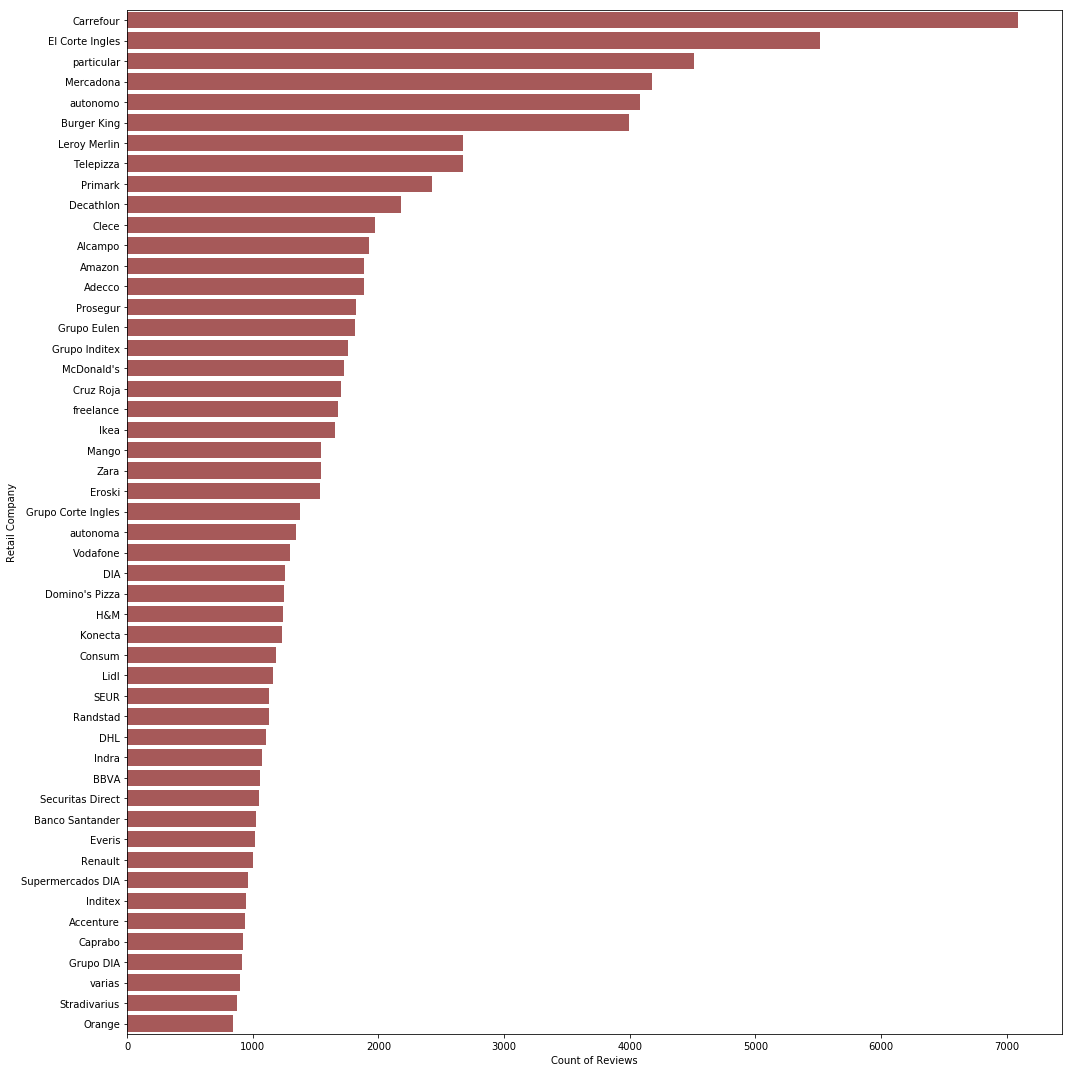

In [31]:
# Plot bar graph of review counts by retail company
plt.figure(figsize=(15,15))
reviewcounts_firm = sns.barplot(countbyfirm_df.Count.head(50), countbyfirm_df.Company.head(50), color="red", saturation=0.3)
reviewcounts_firm.set(xlabel='Count of Reviews', ylabel='Retail Company')
plt.tight_layout()

### Cantidad de reviews por score

In [32]:
# Create dataframe with review counts by rating 
countbyrating = reviews_retail.SCORE.value_counts(sort = False)
rating = countbyrating.index
rcount = countbyrating.values
rcount = list(rcount)
month = list(month)
countbyrating_df = pd.DataFrame({'Rating': rating, 'Count': rcount})

In [33]:
countbyrating_df

,Rating,Count
0,0,1288
1,1,22676
2,2,18387
3,3,51229
4,4,83465
5,5,194684


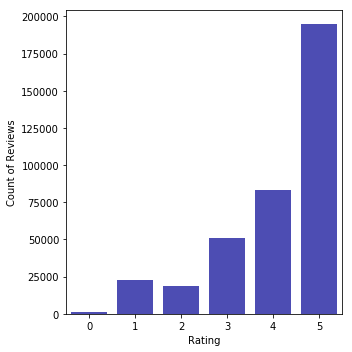

In [34]:
# Plot bar graph of review counts by rating
plt.figure(figsize=(5,5))
reviewcounts_rating = sns.barplot(countbyrating_df.Rating, countbyrating_df.Count, color="blue", saturation=0.4)
reviewcounts_rating.set(xlabel='Rating', ylabel='Count of Reviews')
plt.tight_layout()

Si bien, la mayor parte de las reviews son positivas >3, hay que seguir explorando la Data

### Media de score por empresa

In [46]:
# Create dataframe with average rating by company
avgbycompany = reviews_retail.groupby('EMPRESA').agg({'SCORE': 'mean','EXPERIENCE_ID': 'count'}).sort_values('EXPERIENCE_ID', ascending = False)
avgbycompany_df = avgbycompany.reset_index()

In [47]:
avgbycompany_df.rename(columns={'SCORE': 'Rating',
                        'EXPERIENCE_ID': 'Reviews'}, inplace=True)

#### 50 empresas que tienen mas reviews se crea un segundo df

In [48]:
avgbycompany_df = avgbycompany_df.head(50)

Lista de las 30 empresas para filtrar del total de empresas en el mismo df

In [49]:
lista_empresas = list(avgbycompany_df['EMPRESA'])

In [50]:
avgbycompany_df = avgbycompany_df.sort_values('Rating',ascending = False).reset_index(drop=True)

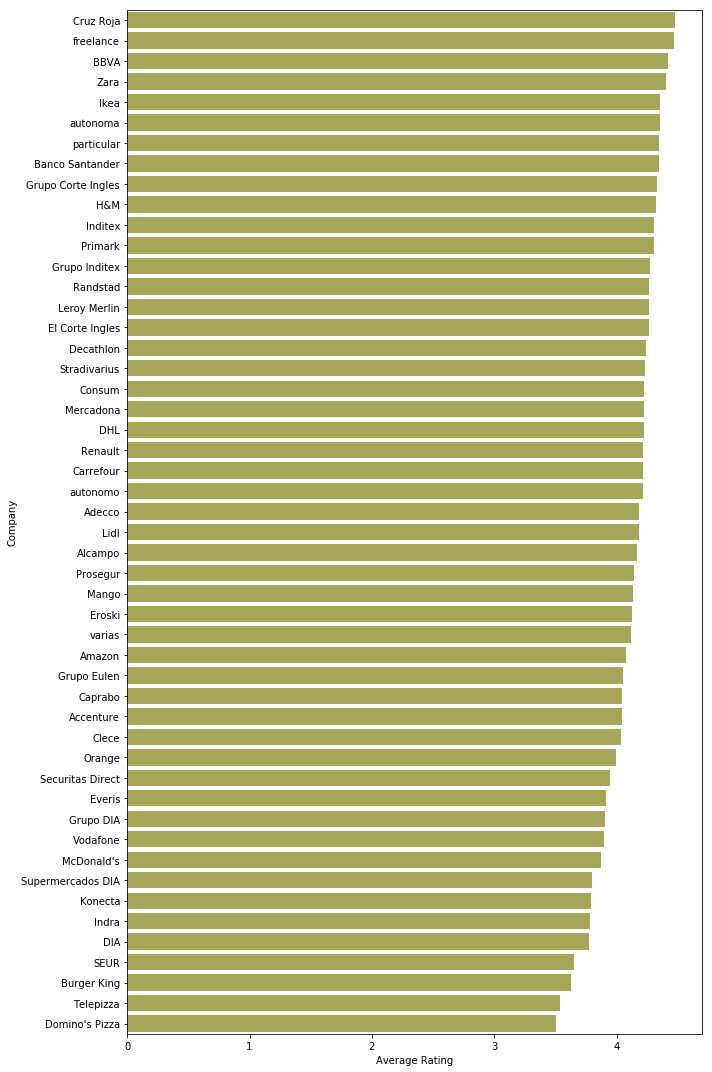

In [51]:
# Plot bar graph of average rating by company
plt.figure(figsize=(10,15))
avgrating_company = sns.barplot(avgbycompany_df.Rating, avgbycompany_df.EMPRESA, color="yellow", saturation=0.3)
avgrating_company.set(xlabel='Average Rating', ylabel='Company')
plt.tight_layout()

El grafico muestra a las 50 empresas con mayor cantidad de reviews ordenadas de manera desc. De esta manera podemos asumir un Ranking entre empresas para el 2019

### Avg de score por mes

In [ ]:
# Create dataframe with average rating by month
avgbymonth = reviews_retail.groupby('MONTH').agg({'SCORE': 'mean'})
avgbymonth = avgbymonth.reset_index()

In [ ]:
avgbymonth.head()

In [ ]:
# Plot bar graph of average rating by month
plt.figure(figsize=(5,5))
avgrating_month = sns.barplot(avgbymonth.MONTH, avgbymonth.SCORE, color="green", saturation=0.4)
avgrating_month.set(xlabel='Month', ylabel='Average Rating')
plt.tight_layout()

Durante los meses de Enero y Febrero baja un poco el score medio, aca se esta considerando toda la data. pero hay que ver como se distribuye tambien el score medio de las 50 empresas anteriores y ver como se comportan durante el tiempo

In [ ]:
# Create dataframe with average rating by month
avgbymonth2 = reviews_retail.groupby('MONTH').agg({'SCORE': 'mean'})
avgbymonth2 = avgbymonth2.reset_index()

In [ ]:
# Plot bar graph of average rating by month
plt.figure(figsize=(5,5))
avgrating_month2 = sns.barplot(avgbymonth2.MONTH, avgbymonth2.SCORE, color="blue", saturation=0.4)
avgrating_month2.set(xlabel='Month', ylabel='Average Rating')
plt.tight_layout()

### HeatMap de evolucion de empresas en el año

Este filtro se crea para trabajar con las mismas 50 empresas con mas reviews

In [329]:
reviews_retail = reviews_retail[reviews_retail['EMPRESA'].isin(lista_empresas)]

In [243]:
reviews_retail.shape

(36396, 10)

In [191]:
# Calculate monthly average rating by company
HeatMonthComp = reviews_retail.groupby(['EMPRESA','MONTH']).agg({'SCORE':'mean'})
HeatMonthComp = HeatMonthComp.reset_index()

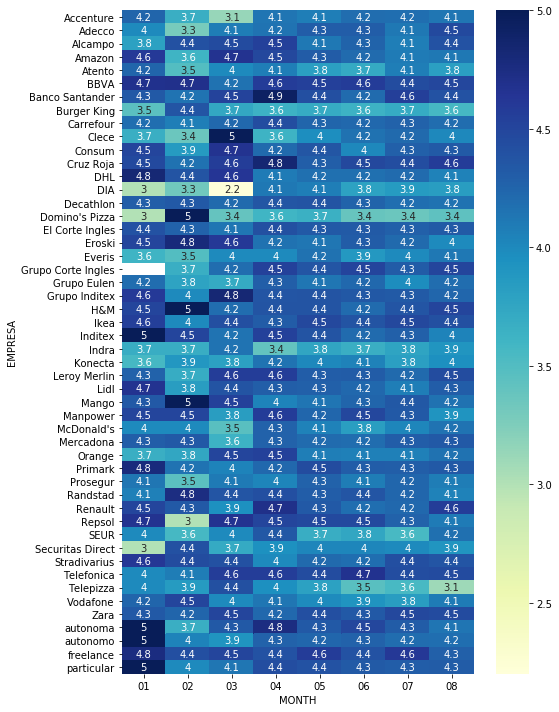

In [283]:
# Draw heatmap for monthly average rating by company
HeatMonthComp_rect = HeatMonthComp.pivot("EMPRESA", "MONTH", "SCORE")
plt.figure(figsize=(8,10))
sns.heatmap(HeatMonthComp_rect, annot=True, cmap="YlGnBu")
plt.tight_layout()

Para contrastar el avg agregamos la cantidad de reviews por mes

In [234]:
# Calculate monthly sum by company
HeatMonthComp2 = reviews_retail.groupby(['EMPRESA','MONTH']).agg({'SCORE':'count'})
HeatMonthComp2 = HeatMonthComp2.reset_index()

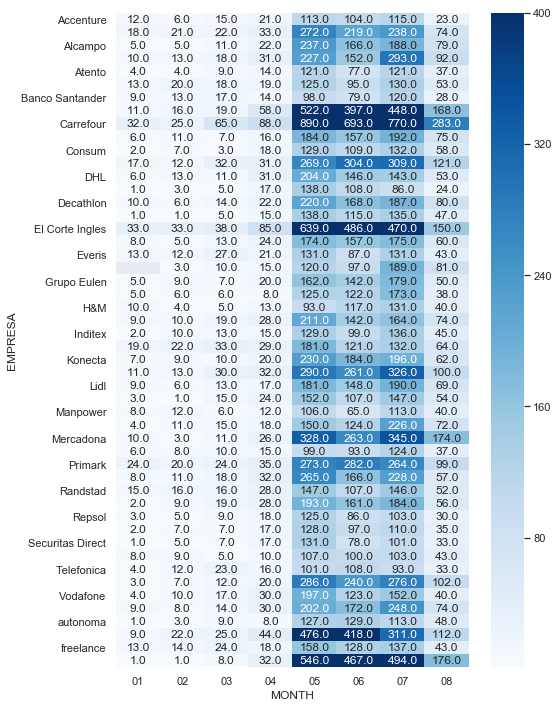

In [335]:
HeatMonthComp_rect2 = HeatMonthComp2.pivot("EMPRESA", "MONTH", "SCORE")
plt.figure(figsize=(8,10))
sns.heatmap(HeatMonthComp_rect2, annot=True, cmap="Blues", fmt = '0', vmax=400)
plt.tight_layout()

Como hay tanta diferencia entre los datos, no es muy clara la evolucion, pero de la imagen anterior con los promedios por empresa, se ve una tencendia a mayor score para los meses de la izquierda, lo que no cuadra con la distribucion de barras que nos dice que esos meses el score baja. Esto se debe a la poca cantidad de datos para ese periodo

#### Escala entre 0 y 1

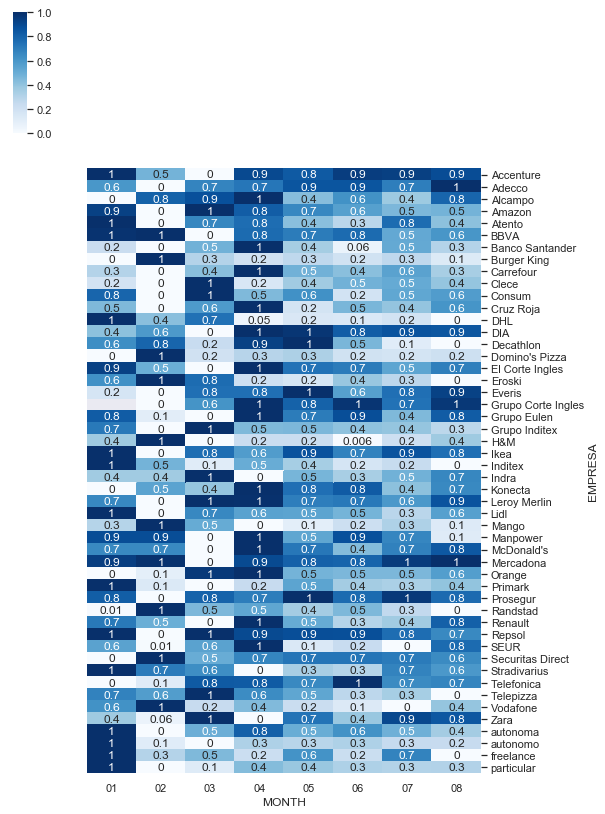

In [334]:
# Draw heatmap for monthly average rating by company (scaled)
HeatMonthCompCluster = sns.clustermap(HeatMonthComp_rect, annot = True, fmt = '.1g', col_cluster = False, row_cluster = False, figsize = (10, 14), standard_scale=0, cmap="Blues")
plt.setp(HeatMonthCompCluster.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.gcf().subplots_adjust(left = 0.05, right = 0.7)

### Cantidad de Reviews menores a 3

In [274]:
# Count monthly review rating below a score of 3 by company
HeatMonthComp_below3 = reviews_retail.groupby(['EMPRESA','MONTH']).apply(lambda x: pd.Series(dict(
    NEGATIVE =(x.SCORE < 3).sum())))
HeatMonthComp_below3 = HeatMonthComp_below3.reset_index()

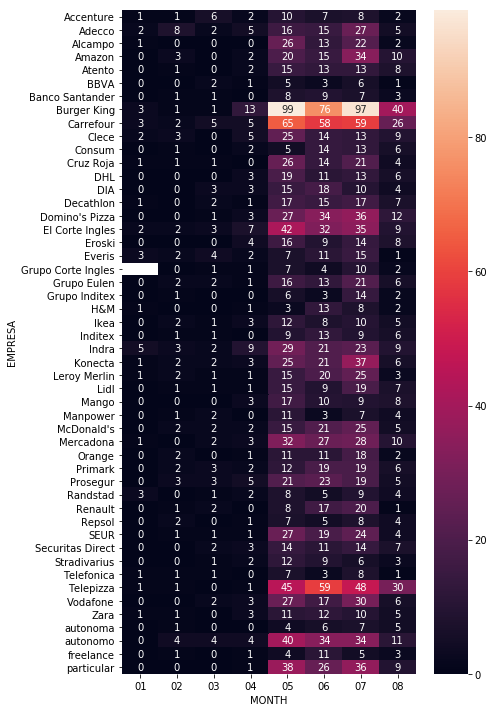

In [291]:
# Draw heatmap for monthly counts of negative reviews (rating < 3.0) by company
HeatMonthComp_below3_rect = HeatMonthComp_below3.pivot("EMPRESA", "MONTH", "NEGATIVE")
plt.figure(figsize=(7,10))
sns.heatmap(HeatMonthComp_below3_rect, annot=True, fmt='g')#, cmap="Blues")
plt.tight_layout()

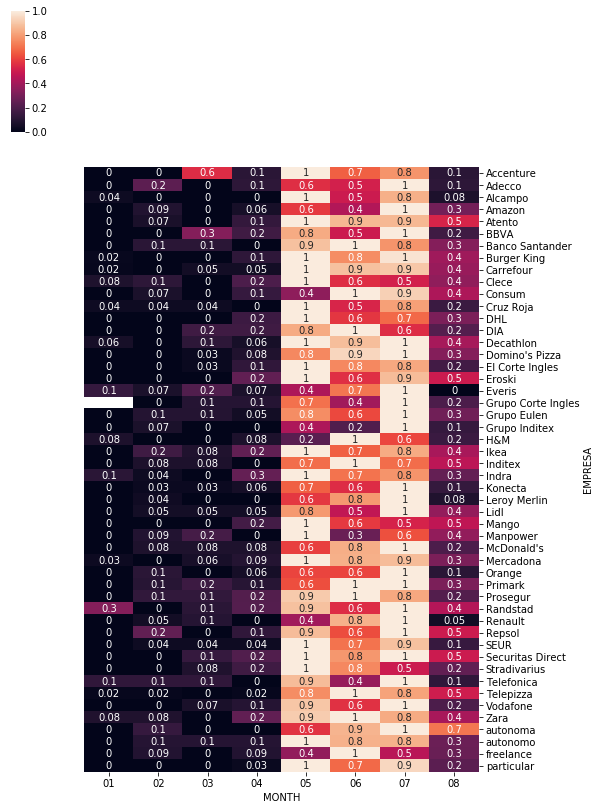

In [290]:
# Draw heatmap for monthly counts of negative reviews (rating < 3.0) by company (scaled)
HeatMonthComp_below3Cluster = sns.clustermap(HeatMonthComp_below3_rect, annot = True, fmt='.1g', col_cluster = False, row_cluster = False, figsize = (10, 14), standard_scale=0)
plt.setp(HeatMonthComp_below3Cluster.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.gcf().subplots_adjust(left = 0.05, right = 0.7)

### Cantidad de Reviews mayores a 3

In [287]:
# Count monthly review rating above a score of 3 by company
HeatMonthComp_above3 = reviews_retail.groupby(['EMPRESA','MONTH']).apply(lambda x: pd.Series(dict(
    POSITIVE =(x.SCORE > 3).sum())))
HeatMonthComp_above3 = HeatMonthComp_above3.reset_index()

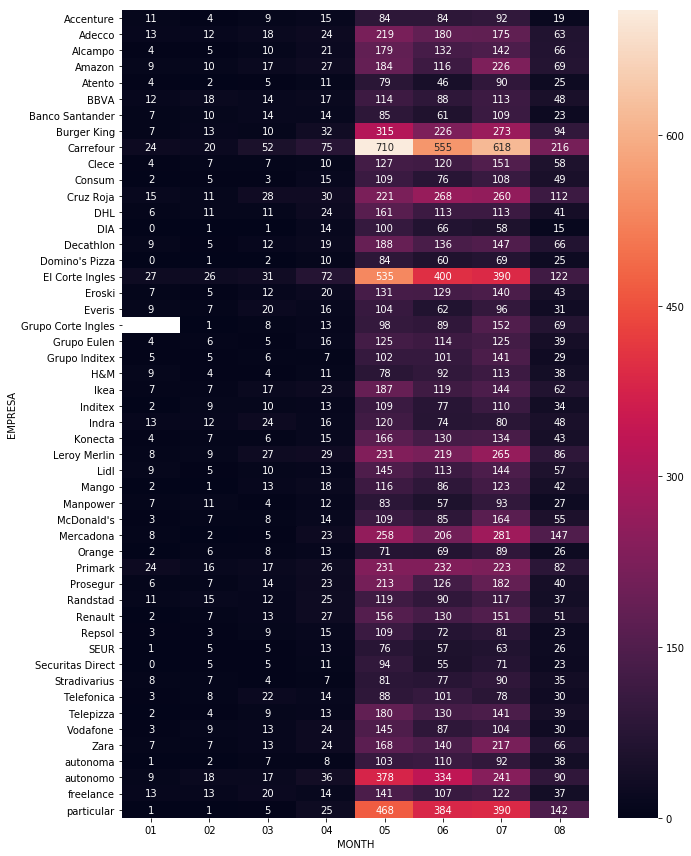

In [289]:
# Draw heatmap for monthly counts of positive reviews (rating > 3.0) by company
HeatMonthComp_above3_rect = HeatMonthComp_above3.pivot("EMPRESA", "MONTH", "POSITIVE")
plt.figure(figsize=(10,12))
sns.heatmap(HeatMonthComp_above3_rect, annot=True, fmt='g')
plt.tight_layout()

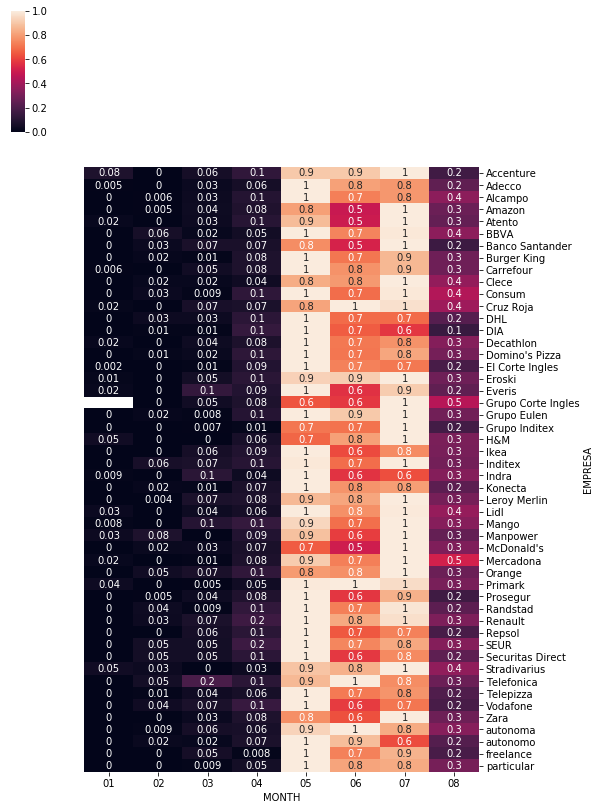

In [293]:
# Draw heatmap for monthly counts of positive reviews (rating > 3.0) by company (scaled)
HeatMonthComp_above3Cluster = sns.clustermap(HeatMonthComp_above3_rect, annot = True, fmt = '.1g', col_cluster = False, row_cluster = False, figsize = (10, 14), standard_scale=0)
plt.setp(HeatMonthComp_above3Cluster.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.gcf().subplots_adjust(left = 0.05, right = 0.7)

### Concl.

Hay un raknig de empresas, con mayor cantidad de reviews y por score medio. 

Se pueden sacar conclusiones por estas TOP 50 empresas pero aun falta informacion para poder distribuir el comportamiento durante el año (meses faltantes enero-abril 2019)